# Assignment 1 - Linear Algebra


In this exercise, you will investigate various aspects of linear algebra. You will study several different methods for solving simultaneous equations :
* matrix inversion using Cramer's rule
* LU decomposition
* SVD decomposition

The cell below contains the matrix inversion method based on Cramer's rule that you will have seen already in the Matrix Inversion notebook. You should use LU and SVD decomposition from SciPy.  See the Advanced Python Tutorial section 5.2.3, as well as the SciPy reference manual for further information :
https://docs.scipy.org/doc/scipy/reference/


In each part of this assignment, you will be asked to write some code in the cell indicated.  If you find it convenient to break your code up over multiple cells, please do so.  You will also be asked to briefly discuss your code and results obtained in a text cell.

You should use numpy and scipy libraries where appropriate. You will always be told explicitly if you should **not** use a particular library.  Make sure to comment your code.  Make sure all cells run from a freshly opened notebook before you submit your work.

In [ ]:
# Importing Required Definitions. #
import numpy as np
import math
import scipy.linalg as linalg
import timeit as tmt
import matplotlib.pyplot as plt
import sys

# Determinant of 2x2 Matrix. #
def det2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")
    
    return ( m[0][0]*m[1][1] ) - ( m[0][1]*m[1][0] )

# Inverse of 2x2 Matrix. #
def inverse2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")

    det = det2x2(m)
    
    if np.abs(det) < sys.float_info.epsilon: # Taking Care of Singular Matrices. #
        raise Exception("Singular Matrix")
        
    tmp = np.empty([2,2])
    tmp[0][0] = m[1][1] / det
    tmp[0][1] = -1 * m[0][1] / det
    tmp[1][0] = -1 * m[1][0] / det
    tmp[1][1] = m[0][0] / det
    return tmp

# Submatrices calculations. #
def submatrix(m,i,j):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    # Create a new matrix. #
    n = m.shape[0]-1
    tmp = np.empty([n,n])
    
    # Get the indices of the matrix that will be used. #
    tmpi = list(range(m.shape[0]))
    del tmpi[i]
    tmpj = list(range(m.shape[1]))
    del tmpj[j]
    
    for ii in range(n):
        for jj in range(n):
            tmp[ii][jj] = m[tmpi[ii]][tmpj[jj]]

    return tmp

# General Matrix determinant calculation. #
def det(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if (m.shape[0]==2):
        return det2x2(m)
        
    else:
        tmp = 0
        # Use 0-th row to calculate determinant. #
        for j in range(m.shape[0]):
            tmp = tmp + (math.pow(-1,j) * m[0][j] * det(submatrix(m,0,j)))
    
    return tmp

# Adjugate Calculation. #
def adj(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    tmp = np.empty(m.shape)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            # note the order of indices below !
            tmp[j][i] = (math.pow(-1,i+j) * det(submatrix(m,i,j)))
    return tmp

# General Matrix Inverse Calculation. #
def inverse(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if m.shape[0]==2:
        return inverse2x2(m)
    
    d = det(m)        
    c = adj(m)
    return np.true_divide(c,d)

# Cramer Method Definition. #
def solveCramer(m,b):
    x = np.zeros(np.shape(b))
    
    for i in range(np.size(b)):       
        mcopy = np.copy(m)
        
        for j in range(np.size(b)):
            mcopy[j][i] = b[j][0]
        x[i][0] = det(mcopy)/det(m)    
        
    return x

# LU Method Definition. #
def LUdecomp(m,b):
    LU,PIV = linalg.lu_factor(m)
    x = linalg.lu_solve((LU,PIV),b)
    return x

# Single Value Decomposition Method Definition. #
def SVD(m,b):
    U,S,Vh = linalg.svd(m)
    C = np.dot(U.T,b)
    W = np.linalg.solve(np.diag(S),C)
    x = np.dot(Vh.T,W)
    return x

# Condition Number Function. #
def condNumber(m):
    U,S,Vt = linalg.svd(m)
    CN = max(S)/min(S)
    return CN

## Part 1

Plot the cpu-time taken to solve a randomly generated simultaneous equation as a function of the matrix order N, for each of the methods mentioned in the introduction.

Note that you will need to :
* generate both a random real NxN matrix, and a random RHS of the matrix equation, using `numpy.random` (see Advanced Python Tutorial section 4.1).
* handle problems that cannot be solved, eg. if the random matrix is singular.
* make sure that your treatment of each routine is "fair", in that each one solves the same problem.

It will take some time to generate results for this part of the assignment.  It is strongly recommended that you test your code for a small range of N initially, eg $2 \leq N \leq 4$, before moving to higher N. **You do not need to generate results using the Cramer's rule method for $N \ge 5$.**, although for LU and SVD decomposition methods, you should be able to generate results for higher N.

It is also strongly recommended that you generate results in one cell, and then analyse them in a separate cell, so you do not have to re-generate results when changing plot styles, for example).

In [ ]:
### Generating Matrices and Performing Calculations. ###

N = int(input('Enter dimension of system of random equations:', )) # User can choose the dimension of the system. #
Nmax_Cramer = 5 # Forbids the operation of Cramer Method for N>5. #

cramer_times = []
LU_times = []
SVD_times = []

N_values = np.arange(2,N+1,1)   # Range of N (dimension of system) determined by user. #
N_values_cramer = np.arange(2,Nmax_Cramer+1,1)   # Range of N only up to 5x5 matrices for Cramer Method. #  

for N in range(2,N+1):
    cram_time = 0
    LU_time = 0
    SVD_time = 0 
    
    for j in range(1000):
        A = np.random.random((N,N))  # Generating random NxN matrix. #
        B = np.random.random((N,1))  # Generating random column vector. #
        
        if N <= Nmax_Cramer: # Cramer Method will cease for N>5. #
            
            # Timing Cramer Method for each random matrix. #
            start_cram = tmt.default_timer()     
            solveCramer(A,B)
            end_cram = tmt.default_timer()
            cram_time += end_cram - start_cram
            
    for i in range(1000):
        A = np.random.random((N,N))  # Generating random NxN matrix. #  
        B = np.random.random((N,1))  # Generating random column vector. #  
        
        # Timing LU Method for each random matrix. #
        start_LU = tmt.default_timer()
        LUdecomp(A,B)
        end_LU = tmt.default_timer()
        LU_time += end_LU - start_LU
        
    for k in range(1000):
        A = np.random.random((N,N))  # Generating random NxN matrix. #
        B = np.random.random((N,1))  # Generating random column vector. #
        
        # Timing SVD Method for each random matrix. #
        start_SVD = tmt.default_timer()
        SVD(A,B)
        end_SVD = tmt.default_timer()
        SVD_time += end_SVD - start_SVD
    
    if N <= Nmax_Cramer: # Averaging of Time for Cramer Method will cease for N>5. #
        
        cramer_times.append(cram_time/1000) # Average Time of Cramer Method for matrices with 2<=N<=5. #
    LU_times.append(LU_time/1000) # Average Time of LU Method for matrices with 2<=N<=5. #
    SVD_times.append(SVD_time/1000) # Average Time of SVD Method for matrices with 2<=N<=5. #

In [ ]:
### PLOTTING RESULTS. ###

plt.plot(N_values_cramer,cramer_times,label='Cramer')
plt.plot(N_values,LU_times,label='LU')
plt.plot(N_values,SVD_times,label='SVD')
plt.xlabel('Number of Dimensions(N)')
plt.ylabel('Time required to solve system(s)')
plt.legend()
plt.show()

plt.plot(N_values,LU_times,label='LU',color='orange')
plt.plot(N_values,SVD_times,label='SVD',color='green')
plt.xlabel('Number of Dimensions(N)')
plt.ylabel('Time required to solve system(s)')
plt.legend()
plt.show()   

### INTRODUCTION

The CPU-Time required to solve a random system of linear equations of $N$ dimensions was plotted against various numbers of dimensions of those systems to determine code performance. Three methods were used to solve these randomly generated systems and their results were compared and discussed in detail. The Cramer Method showed significant increase in calculation time for square matrices with more than five dimensions, while the LU and SVD methods performed substantially better, being able to solve systems of much higher dimensions.

### THE CRAMER METHOD

In linear algebra, Cramer's rule is an explicit formula used to solve a system of linear equations with as many equations as unknowns. It is valid only when the system has a unique solution. That solution is expressed in terms of the determinants of the coefficient matrix and of matrices obtained from it by replacing one column by the column vector of right-hand-sides of the equations. Cramer's rule is computationally inefficient for systems of more than two or three equations as it requires the computation of $N + 1$ determinants in the case of $N$ equations with $N$ unknowns. However, it has been shown that Cramer's rule can be implemented in $O(N!)$ time. In the present case random square systems of linear equations of $N$ dimension are generated. The matrix equation of such a general system is $Ax=B$ where matrix $A$ has dimensions $NxN$ and non-zero determinant.

Given the sequences $1 \leq i_{1}<i_{2}<\ldots<i_{k} \leq n$ and $1 \leq j_{1}<j_{2}<\ldots<j_{k} \leq m$, then $X_{I, J}$ is the $kxk$ submatrix of $X$ with rows in $I:=\left(i_{1}, \ldots, i_{k}\right)$ and columns in $J:=\left(j_{1}, \ldots, j_{k}\right)$.

Let $A_{B}(I, J)$ be the $n \times n$ matrix formed by replacing the $i_{s}$ column of $A$ by the $j_{s}$ column of $B,$ for all $s=1, \ldots, k$.

The submatrix is then given by: $\operatorname{det} X_{I, J}=\frac{\operatorname{det}\left(A_{B}(I, J)\right)}{\operatorname{det}(A)}$.

#### Laplace Equation and Determinants

In linear algebra, the Laplace expansion or cofactor expansion, is an expression for the determinant $|A|$ of an $N×N$ matrix $A$ that is a weighted sum of the determinants of $N$ sub-matrices of $A$, each of size $(N−1)×(N−1)$. However, for large matrices, it quickly becomes inefficient to compute when compared to methods using matrix decomposition.

The calculation of the determinant using the Laplace expansion requires the utilization of the cofactor and minor. The cofactor is a scalar defined as:

$$C_{i j}=(-1)^{i+j} M_{i j}$$

whereas the minor is defined as $M_{ij}$, which is the determinant of the $(N-1)x(N-1)$ matrix that results from deleting the i-th row and j-th column of $A$.

The Laplace epxansion is then calculated using:

$$det(A)=\sum_{j=1}^{n}(-1)^{i^{\prime}+j} b_{i^{\prime} j} \operatorname{det}\left(M_{i^{\prime} j}\right)$$



### LU DECOMPOSITION

Lower-Upper factorisation factors a matrix as the product of a olwer triangular matrix and an upper triangular matrix and it is widely used from computers to solve sqaure systems of linear equations. The LU decomposition is crucial when inverting a matrix or computing the determinant of a matrix. The LU decomposition is implemented in $O(N^3)$ 

Knowing the LU decomposition for a matrix $A$ allows us to solve the linear system $Ax=B$ using a combination of forward and back substitution.

$$\begin{aligned} \mathbf{A} \mathbf{x} &=\mathbf{b} \\ \mathbf{L} \mathbf{U} \mathbf{x} &=\mathbf{b} \\ \mathbf{U} \mathbf{x} &=\mathbf{L}^{-1} \mathbf{b} \\ \mathbf{x} &=\mathbf{U}^{-1}\left(\mathbf{L}^{-1} \mathbf{b}\right) \end{aligned}$$

where $\mathbf{L}^{-1} \mathbf{b}$ is evaluated first using forward substitution and then $\mathbf{x}=\mathbf{U}^{-1}\left(\mathbf{L}^{-1} \mathbf{b}\right)$ using back substitution.

### SINGULAR VALUE DECOMPOSITION

The singular value decomposition of a matrix $A$ is the factorization of $A$ into the product of three matrices $A = UDV^T$ where the columns of $U$ and $V$ are orthonormal and the matrix $D$ is diagonal with positive real entries. For a square matrix LU decomposition can be implemented in $O(N^3)$ time whereas for a non-square $MxN$ matrix in $O(MN^2)$ time. However, in the present case, only square matrices are investigated.

As earlier, in the case of a linear system $Ax=B$ it's solution using the SVD method is given by:

$$\mathbf{x}=\mathbf{V} \mathbf{W}^{-1} \mathbf{U}^{T} \mathbf{B}$$ 

where $W$ is a diagonal matrix, $U^{T}$ the transpose of a unitary matrix and $V$=$U$. The columns of $U$ are eigenvectors whereas the elements of $W$ are eigenvalues. This is for the special case of a $NXN$ system.

### INEFFICIENCY OF CRAMER'S RULE

Solutions for small system's of linear equations can easily be obtained using Cramer's Rule. However, as the number of unknowns grows, the method turns out to be computationally very expensive. Moreover, the calculation of a determinant by its definition may result in overflow or underflow in computer applications. As a result Cramer's Rule is highly impractical in computer applications. The immense computational cost of this method depends exclusively on the determinant calculations which incorporate Laplace's expansion which in its turn utilizes minors to obtain those determinants resulting in a complexity of $\mathcal{O}(N!)$. In addition, Cramer's rule may also pertain to numerical instability due to round error difficulties. Given the fact that Cramer's rule computational expense depends solely on the method implemented to obtain the required determinants, it is possible to significantly reduce the cost by establishing more reliable methods of obtaining those determinants.

The implementation of the present algorithm utilises cofactors and minors through Laplace's equation to obtain the determinants of a given random matrix rendering it extremely intensive computationally. By choosing the appropriate number of dimensions it was validated that for $N>5$ computation time increases significantly, reaching the limit of practical applications.

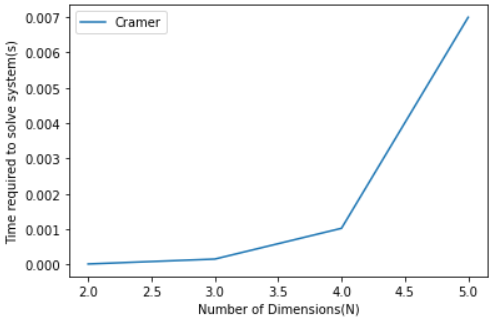

The computational complexity for each dimension of a system is illustated in the figure above. It was not a challenge for the adapted algorithm to obtain solutions for a $2x2$ or $3x3$ system of equations but for higher dimensions this was not the case. The computation time is proportional to the factorial $\mathcal{O}(N!)$ of the number of dimensions of the system. Hence, comparing the complexity of a 2D system with a 5D system, it is obtained that $2!=2$ and $5!=120$ respectively. To demonstrate how powerful the effect of factorial dependence is, the complexity of a 10D system would be $10!=3,628,800$. 

#### CHIO'S CONDENSATION IMPROVEMENT

Chio’s condensation reduces a matrix of order $N$ to order $N−1$ while calculating its determinant. Repeating the procedure numerous times leads to the reduction of a large matrix to a practical size, such that Cramer's Rule can efficiently handle.

The foundation of this method is Chio's Pivotal Condensation Theorem:

For a given $NxN$ matrix $A=[a_{ij}]$ where $a_{ij}$ is non-zero a matrix D is denoted. This matrix is constructed by replacing elements $a_{ij}$ in the lead row or column by:

$$\left|\begin{array}{ll}a_{11} & a_{1 j} \\ a_{i 1} & a_{i j}\end{array}\right|$$

The determinant of matrix $|A|$ is then given by:

$$|A|=\frac{|D|}{a_{11}^{n-2}}$$

The cost of using Chio's condensation is equivalent to computing $(N-k)^{2} 2 \times 2$ determinants and $(N-k)$ divisions to create $a_{k k}=1 .$ Hence, the computational effort required to reduce an $N \times N$ matrix to a $1 \times 1$ matrix is $\mathcal{O}\left(N^{3}\right),$ 

$$
\sum_{k=1}^{N-1} 2(N-k)^{2}+(N-k)=\frac{2 N^{3}}{3}-\frac{N^{2}}{2}-\frac{N}{6}-\sim \mathcal{O}\left(N^{3}\right)
$$

Finally, combining Chio's condensation with Cramer's Rule the final cost amount to $\mathcal{O}(N^4)$ which is suitable for practical applications.

#### MATRIX MIRRORING IMPROVEMENT

Matrix Mirroring is an improvement upon Chio's Condensation which reduces complexity further to $\mathcal{O}(N^3).$ To achieve this some of the previous intermediate calculations performed during the condensation steps are reused. More specifically, a binary is constructed. This is a tree-based data flow in which the algorithm mirrors the matrix at critical points during the condensation process.

The first critical point is that a matrix $A$ and a vector of constants $B$ are passed as arguments to the algorithm which appends $B$ to $A$ in order to create an augmented matrix. Thus all calculations performed on the matrix are also performed on the vector, whereas the normal Cramer's Rule utilization would require substitution of the column corresponding to a variable with the vector $B$. However, this algorithm creates a delay in which multiple variables can be solved taking advantage of one line of Chio's condensation. To preserve the information accosiated with the discarded columns after condensation a mirror matrix is created every time the matrix size is halved. After mirroring each matrix is assigned half of its initial values, resulting in the original matrix solving for the latter half and the mirror matrix solving for the first half of the variables. The key in this method is that each matrix uses condensation to create a reduced matrix with size at least equal to the number of variables it's responsible for. Finally, after the reduction stage, the algorithm uses Cramer's rule to solve for all variables. Matrix mirroring and condensation will repeat themselves for many dimensional systems of linear equations until the appropriate dimensional level is reached.

#### LU DECOMPOSITION COMPLEXITY

Compared to Cramer's Rule the LU decomposition is computationally more efficient as it requires a significantly lower number of operations to obtain the determinant of a multi-dimensional matrix. It is less intensive to compute the inverse of a lower and upper triangular matrix which makes it an extremely practical method of determining the solutions of any linear system. The results obtained by the present algorithm verify that the LU decomposition outperforms Cramer's rule, being able to solve enormous square systems of linear equations in brief times. To emphasize the difference in complexity and hence code performance the complexity of solving a 20D system of equations with Cramer's rule and LU decomposition are compared. The LU decomposition of complexity $\mathcal{O}(N^3)$ yields $8000$ whereas Cramer's Rule approximately $2.4*10^{18}$.  

#### SVD COMPLEXITY

Similarly to the LU decomposition and in contrast to Cramer's rule, the SVD method handles systems of much greater dimensions effectively with computational cost $\mathcal{O}(N^3)$. However, slight performance differences were observed while colsely comparing the SVD method to the LU method, showing a greater time delay for the SVD method. This is due to the fact that the SVD has to perform more matrix multiplications to reach the final solutions for all variables.


#### FAIRNESS OF COMPARISON BETWEEN METHODS

It was ensured that the comparison of the methods was fair by generating 1000 matrices of the same dimension $N$ for all values of $N$ in the range $[2,N]$. The times required by each method to solve the vast number of random systems generated for each $N$ were appended to their corresponding lists for each method and averaged for those 1000 repetitions to provide a reasonable estimate of the time required to obtain one individual solution for each $N$.


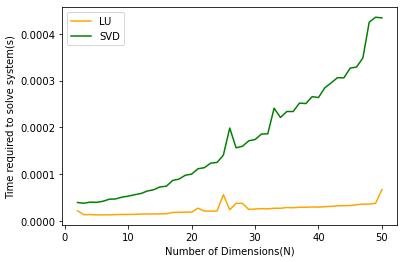

Figure above shows CPU time required by the LU and SVD methods to solve a random system of linear equations against $N$. For each matrix with $N$ between 2 and 50, 1000 repetitions of each method were performed to ensure consistency. It is important to mention, that the tiny spikes observed in all of the previous and following graphs are due to the cache memory of the processor of the computer device used to perform the analysis at the time of code compilation. Hence, the graphs depicted may not be identical when run on another device. Secondly, the randomness of the matrices also affects the occurence of the spikes at random points. It may also be the case, that in some devices steep increases may be present for a very large number of dimensions $N>100$.

## Part 2
Next, we will study the precision of the algorithms - in particular, for near singular matrices. Write a routine that will estimate (and plot) the accuracy of the result when solving the equation below, for small values of k. Your function should do this for all 3 routines in Part 1.

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

You will need to choose a method to estimate the accuracy of the result, given that the equation solvers will return values for all of x, y, and z.  You should study a range of values of k to ensure that

In [ ]:
### Near Singular Matrices Analysis. ###

k_values = np.linspace(1e-14,1e-12,200)  # Range of Values for k with specified number of elements. #
RHS = np.array([[5],[10],[15]])  # RHS column vector. # 

# 1st Method Analysis Arrays. #

sol_cram = np.array([])
sol_LU = np.array([])
sol_SVD = np.array([])
sol_analyt = np.array([])
error_cram = np.array([]) 
error_LU = np.array([])
error_SVD = np.array([])

# 2nd Method Analysis Arrays. #

error_cram2 = np.array([]) 
error_LU2 = np.array([])
error_SVD2 = np.array([])

# Condition Number Values Array. #
CN_values = np.array([])

for i in k_values:
    NS_matrix = np.array([[1,1,1],[1,2,-1],[2,3,i]]) # A matrix is generated for each element in the range of Values for k. #
    
    # Adding the Norm of Solutions for all Methods to their allocated array.#
    sol_cram = np.append(sol_cram,np.linalg.norm(solveCramer(NS_matrix,RHS)))
    sol_LU = np.append(sol_LU,np.linalg.norm(LUdecomp(NS_matrix,RHS)))
    sol_SVD = np.append(sol_SVD,np.linalg.norm(SVD(NS_matrix,RHS)))
    sol_analyt = np.append(sol_analyt,np.linalg.norm(inverse(NS_matrix)@RHS))
    
    # Evaluating the Error of each method with the 1st Analysis Method. #
    error_cram = np.abs(np.subtract(sol_cram,sol_analyt)) 
    error_LU = np.abs(np.subtract(sol_LU,sol_analyt))
    error_SVD = np.abs(np.subtract(sol_SVD,sol_analyt))
    
    # Evaluating the Error of each method with the 2nd Analysis Method. #
    error_cram2 = np.append(error_cram2,np.linalg.norm(NS_matrix@solveCramer(NS_matrix,RHS)-RHS))
    error_LU2 = np.append(error_LU2,np.linalg.norm(NS_matrix@LUdecomp(NS_matrix,RHS)-RHS))
    error_SVD2 = np.append(error_SVD2,np.linalg.norm(NS_matrix@SVD(NS_matrix,RHS)-RHS))  
    
    # Calculating Condition Number values. #
    CN_values = np.append(CN_values,condNumber(NS_matrix))
    
    

# Plotting Results for 1st Analysis Method. #    
plt.plot(k_values,error_cram,label='Cramer',color='blue') 
plt.plot(k_values,error_LU,label='LU',color='orange')    
plt.plot(k_values,error_SVD,label='SVD',color='green')
plt.xlabel('Values of k')
plt.ylabel('Error from First Comparison')
plt.legend()
plt.show()

# Plotting Results for 2nd Analysis Method. #
plt.plot(k_values,error_cram2,label='Cramer',color='blue')
plt.plot(k_values,error_LU2,label='LU',color='orange')
plt.plot(k_values,error_SVD2,label='SVD',color='green')
plt.xlabel('Values of k')
plt.ylabel('Error from Second Comparison')
plt.legend()
plt.show()

# Plotting condition number against k values. #
plt.plot(k_values,CN_values,label='Condition Number')
plt.xlabel('Values of k')
plt.ylabel('Condition Number')
plt.legend()
plt.show()

### PRECISION ANALYSIS

Two techniques were used to determine the precision of the adapted algorithm for all of the three methods. Both of them showed different results which aided in determining the most suitable approach. In the first approach, the norm of the results obtained by Cramer's Rule and LU and SVD decomposition were subtracted from the result obtained by multiplying the inverse of the matrix in the LHS with the vector on the RHS. However, by comparison to the second method it was found that the dominating contributor to the errors that were plotted was due to the calculation of the inverses. More specifically, these errors arose from the calculation of inverses with a determinant approaching zero. In the second approach, having realised why errors are greater than expected a more accurate comparison was adapted. Instead, the solutions obtained by each method were multiplied with the original matrix in the LHS and then subtracted by the RHS. This ensured, that the effect of the error in the calculation of the inverse was gotten rid off and only the errors due to other factors were displayed. For Cramer's Rule and the SVD method a similar trend in the error plots as in the first approach was observed without significant deviation. However, the overall decrease in error verified the initial claim that the error in the inverse calculation was affecting results. Interestingly enough, there were no errors obtained for the LU decomposition, suggesting that the SciPy library utilises a method which effectively handles near singular matrices, disregarding any errors originating from them. 

The errors corresponding to SVD seem to be zero but this is not the case. This is a scale effect caused due to the coexisting plot of the errors due to Cramer's Rule. Zooming into the error plot, erros in the SVD method are revealed and shown in the Figure below.

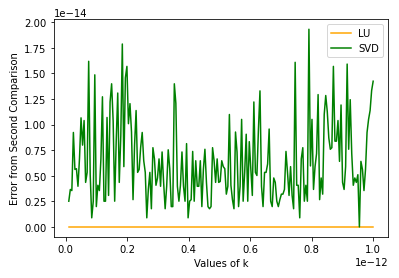

By zooming into the plot the possibility of the zero error in the LU decomposition due to the scaling effect is ruled out.
By plotting the condition number of the matrices against the values of k it is seen that as k increases the condition number decreases rapidly. This corresponds to the error in the previous plots which also decreases rapidly as k becomes greater than zero. Hence, a large condition number corresponds to a large error in calculation. 

The effect of choosing a range of values k which are very close system epsilon and thus have a very large condition number, was also investigated to check the precision of the algorithm. In the range of k between 2 epsilon and 50 epsilon, much more different error curves were obtained.

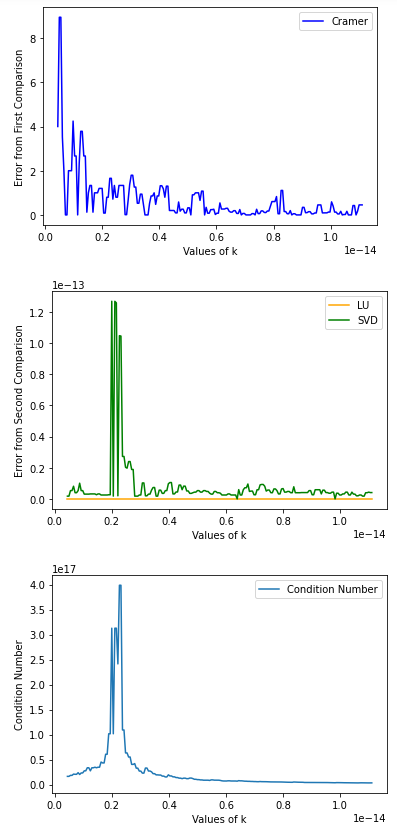

The behavior of the three plots above suggests that the matrices created in that range are ill-conditioned with $C>10^{12}$, where $C$ is the conditon number. Such a matrix is almost singular, and the computation of its inverse, or solution of a linear system of equations is prone to large numerical errors. A matrix that is not invertible has condition number equal to infinity. This is all due to the fact the $k$ is the determinant of the given matrix in the LHS, so as it approaches zero due to the ill conditions, the algorithm fails to precisely calculate its inverse. 